This notebook represents the results of the use of a naive algorithm:
    
    for each day the most frequent haplotype is selected.


In [1]:
%matplotlib inline
import os
import numpy as np
import sys
import matplotlib.pyplot as plt

# adding project folder to lib search path
project = os.path.split(os.getcwd())[0]
if project not in sys.path:
    sys.path.append(project)
    
from HIV_project.scripts.loader import Loader
from HIV_project.scripts.patient import Patient
from HIV_project.scripts.aa_properties import aaprop_sequence

In [2]:
# downloading data
loader = Loader()
loader.load_haplotypes()
loader.load_reference()

In [3]:
# selecting patient
patient = Patient('p1')

No haplotype for patient p1 for region vpr
No haplotype for patient p1 for region p1
No haplotype for patient p1 for region p2
No haplotype for patient p1 for region p6
No haplotype for patient p1 for region p7


/Users/a.ovsiannikova/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


In [4]:
# selecting major haplotypes
m = patient.regions.major().translated.apply(aaprop_sequence)

/Users/a.ovsiannikova/PycharmProjects/HIV_project/scripts/aa_properties.py:57: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return aa_properties.loc[list(sequence)].sum()


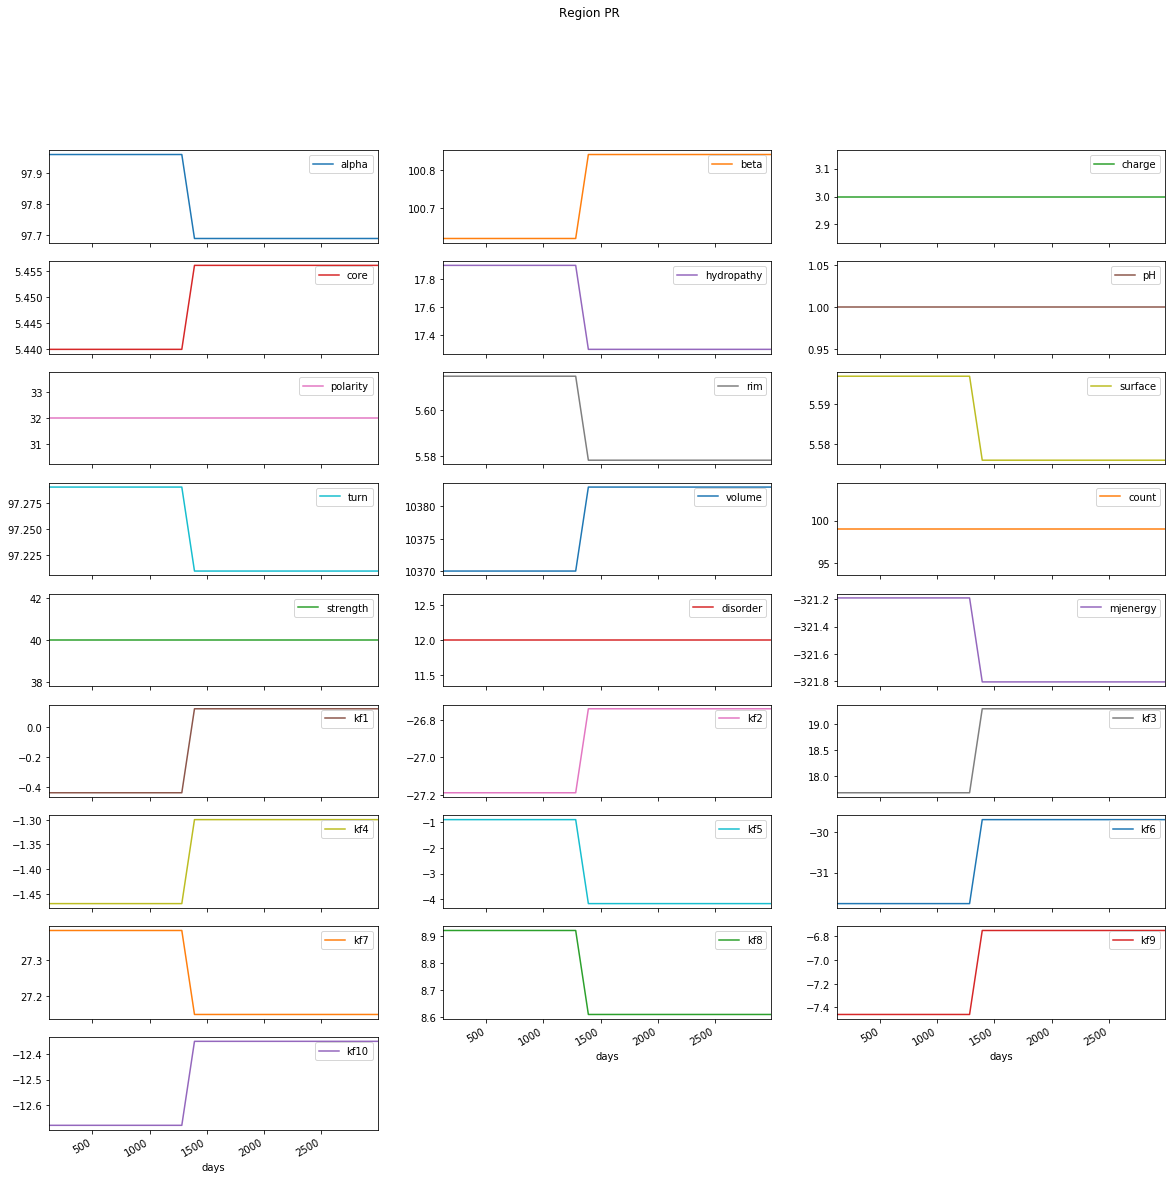

In [5]:
# plotting changes for a specific region
region = 'PR'
plotting_data = m.loc[region, m.std() != 0]
plot = plotting_data.plot.line(use_index=True, y=plotting_data.columns, figsize=(20, 20), subplots=True, 
                               layout=(9, 3), title=f'Region {region}')